<a href="https://colab.research.google.com/github/utkarsh0702/Pytorch/blob/master/PyTorch5_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

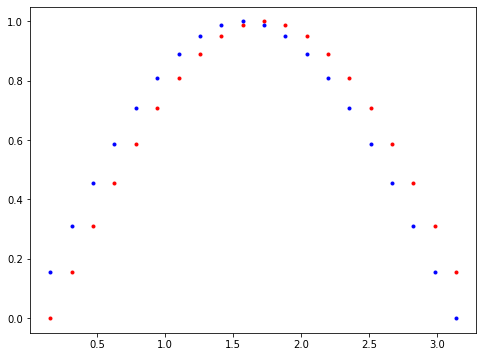

In [3]:
plt.figure(figsize=(8, 6))
seq_length= 20
time_step= np.linspace(0, np.pi, seq_length+1)
data= np.sin(time_step)
data.resize((seq_length+1,1))

x= data[:-1]
y= data[1:]

plt.plot(time_step[1:], x, "r.", label="Input(x)")
plt.plot(time_step[1:], y, "b.", label="Target(y)")
plt.show()

In [0]:
class RNN(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, n_layers):
    super(RNN, self).__init__()
    self.hidden_dim= hidden_dim

    self.rnn= nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
    self.fc= nn.Linear(hidden_dim, output_size)
  
  def forward(self, x, hidden):
    batch_size= x.size(0)
    r_out, hidden= self.rnn(x, hidden)
    r_out= r_out.view(-1, self.hidden_dim)

    output= self.fc(r_out)
    return output, hidden

In [17]:
#Test the RNN for Shape and Size
test_rnn= RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

#Evenly spaced test data points
time_step= np.linspace(0, np.pi, seq_length)
data= np.sin(time_step)
data.resize((seq_length,1))

test_input= torch.Tensor(data).unsqueeze(0)
print('Input Size:', test_input.size())

test_out, test_h= test_rnn(test_input, None)
print('Output Size:', test_out.size())
print('Hidden State Size:', test_h.size())

Input Size: torch.Size([1, 20, 1])
Output Size: torch.Size([20, 1])
Hidden State Size: torch.Size([2, 1, 10])


In [18]:
#Instansiate an RNN
rnn= RNN(1,1,32,1)
print(rnn)
loss_function= nn.MSELoss()
optimizer= torch.optim.Adam(rnn.parameters(), lr=0.01)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [0]:
def train(rnn, n_steps, print_every):
  hidden= None
  for i, step in enumerate(range(n_steps)):
    time_steps= np.linspace(step*np.pi, (step+1)*np.pi, seq_length+1)
    data= np.sin(time_steps)
    data.resize((seq_length+1,1))

    x= data[:-1]
    y= data[1:]
    x_tensor= torch.Tensor(x).unsqueeze(0)
    y_tensor= torch.Tensor(y)

    prediction, hidden= rnn(x_tensor, hidden)
    hidden= hidden.data
    loss= loss_function(prediction, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i% print_every ==0:
      print('Loss:', loss.item())
      plt.figure()
      plt.plot(time_steps[1:],x,'r.')
      plt.plot(time_steps[1:],prediction.data.numpy().flatten(),'b.')
      plt.plot()
  
  return rnn

Loss: 0.33332115411758423
Loss: 0.015161627903580666
Loss: 0.0007780947489663959
Loss: 0.00039236946031451225
Loss: 0.0005042075063101947


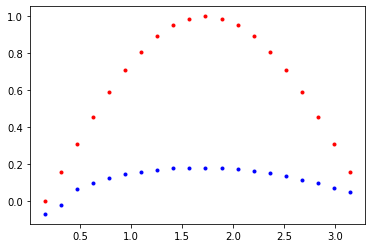

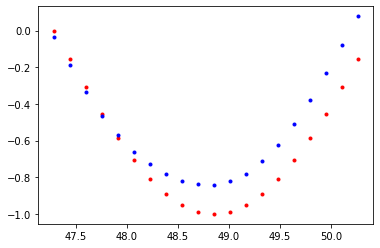

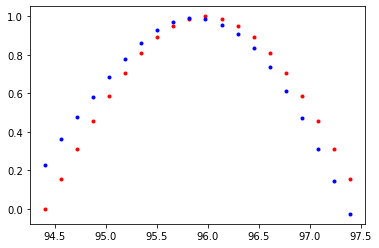

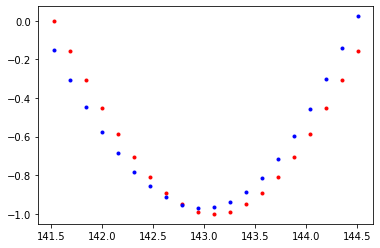

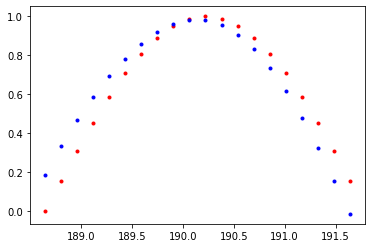

In [20]:
n_steps=75
print_every=15
trained_rnn= train(rnn, n_steps, print_every)